# Tugas Praktikum #1

Meyta Rizki Khairunisa

24060122130085

Lab C1 Machine Learning

  2. Buatlah evaluasi algoritma dengan dataset yang telah dicoba pada tugas praktikum sebelumnya! (dengan menggunakan 3 model yaitu KNN, NB, dan SVM)

In [2]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Code diatas merupakan beberapa daftar pustaka yang diperlukan untuk melakukan analisis data dan visualisasi pada Machine Learning

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pandas.read_csv(url, header=None)

Code diatas digunakan untuk memuat dataset yang langsung diambil dari alamat repository UCI Machine Learning. Pada code URL pertama diberikan daftar untuk memberikan nama kolom pada dataset, seperti sepal-length, sepal width, petal-length, dan yang lainnya. Sedangkan pada code URL kedua menunjukan bahwa dataset tidak diberikan nama sehingga kolom akan otomatis diberi nama 0, 1, 2, 3, ...

In [13]:
print(dataset.iloc[50:70])

      0    1    2    3                4
50  7.0  3.2  4.7  1.4  Iris-versicolor
51  6.4  3.2  4.5  1.5  Iris-versicolor
52  6.9  3.1  4.9  1.5  Iris-versicolor
53  5.5  2.3  4.0  1.3  Iris-versicolor
54  6.5  2.8  4.6  1.5  Iris-versicolor
55  5.7  2.8  4.5  1.3  Iris-versicolor
56  6.3  3.3  4.7  1.6  Iris-versicolor
57  4.9  2.4  3.3  1.0  Iris-versicolor
58  6.6  2.9  4.6  1.3  Iris-versicolor
59  5.2  2.7  3.9  1.4  Iris-versicolor
60  5.0  2.0  3.5  1.0  Iris-versicolor
61  5.9  3.0  4.2  1.5  Iris-versicolor
62  6.0  2.2  4.0  1.0  Iris-versicolor
63  6.1  2.9  4.7  1.4  Iris-versicolor
64  5.6  2.9  3.6  1.3  Iris-versicolor
65  6.7  3.1  4.4  1.4  Iris-versicolor
66  5.6  3.0  4.5  1.5  Iris-versicolor
67  5.8  2.7  4.1  1.0  Iris-versicolor
68  6.2  2.2  4.5  1.5  Iris-versicolor
69  5.6  2.5  3.9  1.1  Iris-versicolor


Code diatas merupakan perintah untuk melihat baris dataset yang ke 50 sampai 70

In [6]:
print(dataset.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


Code diatas merupakan perintah untuk mendeskripsikan statistik data meliput count, mean, standard deviasi, nilai min, nilai max, dan quartile

# Membuat validasi dataset

In [7]:
#Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)

Validasi dataset digunakan untuk mengetahui bahwa model yang dibuat itu sudah tepat. Validasi ini akan menggunakan metode statistik untuk memperkirakan keakuratan model yang dibuat pada data yang tidak terlihat. Pada dataset ini akan terbagi menjadi 2, yaitu 80% akan digunakan untuk training model dan 20% akan digunakan untuk data validasi

Penjelasan code:

* *dataset.values* = digunakan untuk mengambil
semua nilai dalam dataset, kemudian dari dataset akan diambil semua baris dari kolom 0 - 3 untuk diinisialisasikan ke X dan semua baris pada kolom 4 untuk diinisialisasikan ke Y
* *validation_size = 0.20* = menggunakan 20% untuk validasi dan sisanya untuk training model
* *seed = 7* = digunakan untuk memastikan konsistensi pembagian data
* Selanjutnya pada bagian bawah dijelaskan fungsi untuk membagi dataset pada X dan Y pada data mana yang akan dilatih dan data mana yang akan divalidasi

# K-Folds Cross Validation

In [8]:
# Test options and evaluation matric
seed = 7
scoring = 'accuracy'

Dilakukan validasi silang sebanyak 10 kali lipat untuk memperkirakan akurasi. Berdasarkan code diatas, maka dilakukan pembagian dataset menjadi 10 bagian, 9 untuk latihan dan 1 untuk pengujian dan ulangi untuk semua kombinasi.

# Membangun Model

In [9]:
#Spot Check Algoritma
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Code diatas merupakan proses awal untuk menguji beberapa model Machine Learning secara cepat dan menentukan algoritma mana yang memiliki performa terbaik untuk dataset tertentu

In [10]:
#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Code diatas digunakan untuk mengimplementasikan evaluasi model menggunakan cross validation. Pada code dilakukan pembagian menjadi 10 yang kemudian di uji secara bergantian. Tujuan dilakukannya adalah untuk membandingkan rata-rata akurasi dan kestabilan performa dan untuk memilih model terbaik dengan rata-rata akurasi tinggi.

Didapatkanlah hasil KNN dengan rata-rata akurasi 96.67% dengan standar deviasi 4.08%, kemudian NB dengan rata-rata 95% dengan standar deviasi 5%, dan SVM denganrata-rata 96.67% dengan standar deviasi 4.08%

# Memilih Model terbaik

In [11]:
# Make prediction on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
cm = confusion_matrix(Y_validation, predictions)
print(cm)
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Code diatas digunakan untuk melatih model SVM menggunakan data training, memprediksi data validasi, dan mengevaluasi performa model berdasarkan metrik tertentu.

Di awal akan dihitung akurasi hasilnya, dan akurasi model sebesar 86.67% menunjukkan bahwa model SVM bekerja cukuo baik, kemudian didapat juga hasil confusion matrix serta laporan klasifikasi hasil recall, precision, dan f1-score. Kemudian diolah lagi data tersebut untuk menemukan hasil accuracy, macro avg, dan weighted avg

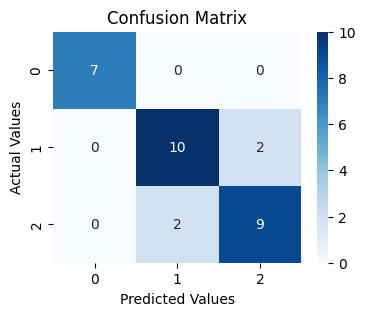

In [12]:
#create a pandas dataframe from the confusion matrix
classes = np.unique(Y_train)
cm_df = pandas.DataFrame(cm, index=classes, columns=classes)

#Visualize the confusion matrix using Seaborn
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Code diatas merupakan implementasi bagaimana cara memvisualisasi hasil dari confusion matrix